# HRIR/HRTF Example Notebook
This notebook demonstrates loading SOFA HRIR/HRTF data, detecting arrival peaks/troughs, and visualizing head-related impulse responses using the Peak_Finding_Toolbox.

---

## 1. Setup and Imports

In [2]:
import os, sys
from pathlib import Path
# Repo root is parent directory of this notebook
repo_root = Path().resolve().parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))
    
%pip install -e ..
    
import numpy as np
from toolbox.data_loader import load_hrir_from_sofa
from toolbox.peak_finder import detect_peaks
from toolbox.plotting import plot_hrir

Obtaining file:///mnt/c/Users/Brody/OneDrive/Documents/Coding/GitHub/Peak_Finding_Toolbox
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for Peak_Finding_Toolbox (pyproject.toml) ... done
  Created wheel for Peak_Finding_Toolbox: filename=peak_finding_toolbox-0.1.0-0.editable-py3-none-any.whl size=4193 sha256=daef6042b7c56629a35c5b758d6ad0d8709e46bd5b95f3fcb6bc47434532cae1
  Stored in directory: /tmp/pip-ephem-wheel-cache-qg3zip7z/wheels/71/79/2e/b02f985037b822faa60f220acd6a1a89055dae999e079cfe32
Successfully built Peak_Finding_Toolbox
  Attempting uninstall: Peak_Finding_Toolbox
    Found existing installation: Peak_Finding_Toolbox 0.1.0
    Uninstalling Peak_Finding_Toolbox-0.1.0:
      Successfully uninstalled Peak_Finding_Toolbox-0.1.0
Note: you may need to restart the kernel to use updated packages.


---

## 2. Load SOFA HRIR Data

In [3]:
# 2.1 Path to SOFA file and channel selection
sofa_path = '../data/hrtf_data/sofa/hpir_SennheiserHD650_nh830.sofa'

# 2.2 Load left-ear impulse response
hrir, fs = load_hrir_from_sofa(sofa_path, channel='left')

# 2.3 Time vector in milliseconds
times_ms = np.arange(len(hrir)) / fs * 1000

---

## 3. Detect Peaks and Troughs

In [4]:
# 3.1 Detect first 5 peaks (arrivals)
peaks = detect_peaks(hrir, times_ms, n_peaks=5, base_sigma=1.0, mode='hrir')

# 3.2 Detect first 5 troughs by inverting signal
troughs = detect_peaks(-hrir, times_ms, n_peaks=5, base_sigma=1.0, mode='hrir')

# 3.3 Display latencies
print("Peak latencies (ms):", np.round(times_ms[peaks], 2))
print("Trough latencies (ms):", np.round(times_ms[troughs], 2))

Peak latencies (ms): [0.4  0.54 0.65 0.77 0.85]
Trough latencies (ms): [0.5  0.62 0.71 0.81 0.94]


---

## 4. Visualization with `plot_hrir`

HRIR plot saved to: results/hpir_SennheiserHD650_nh830_2_hrir_plot.png


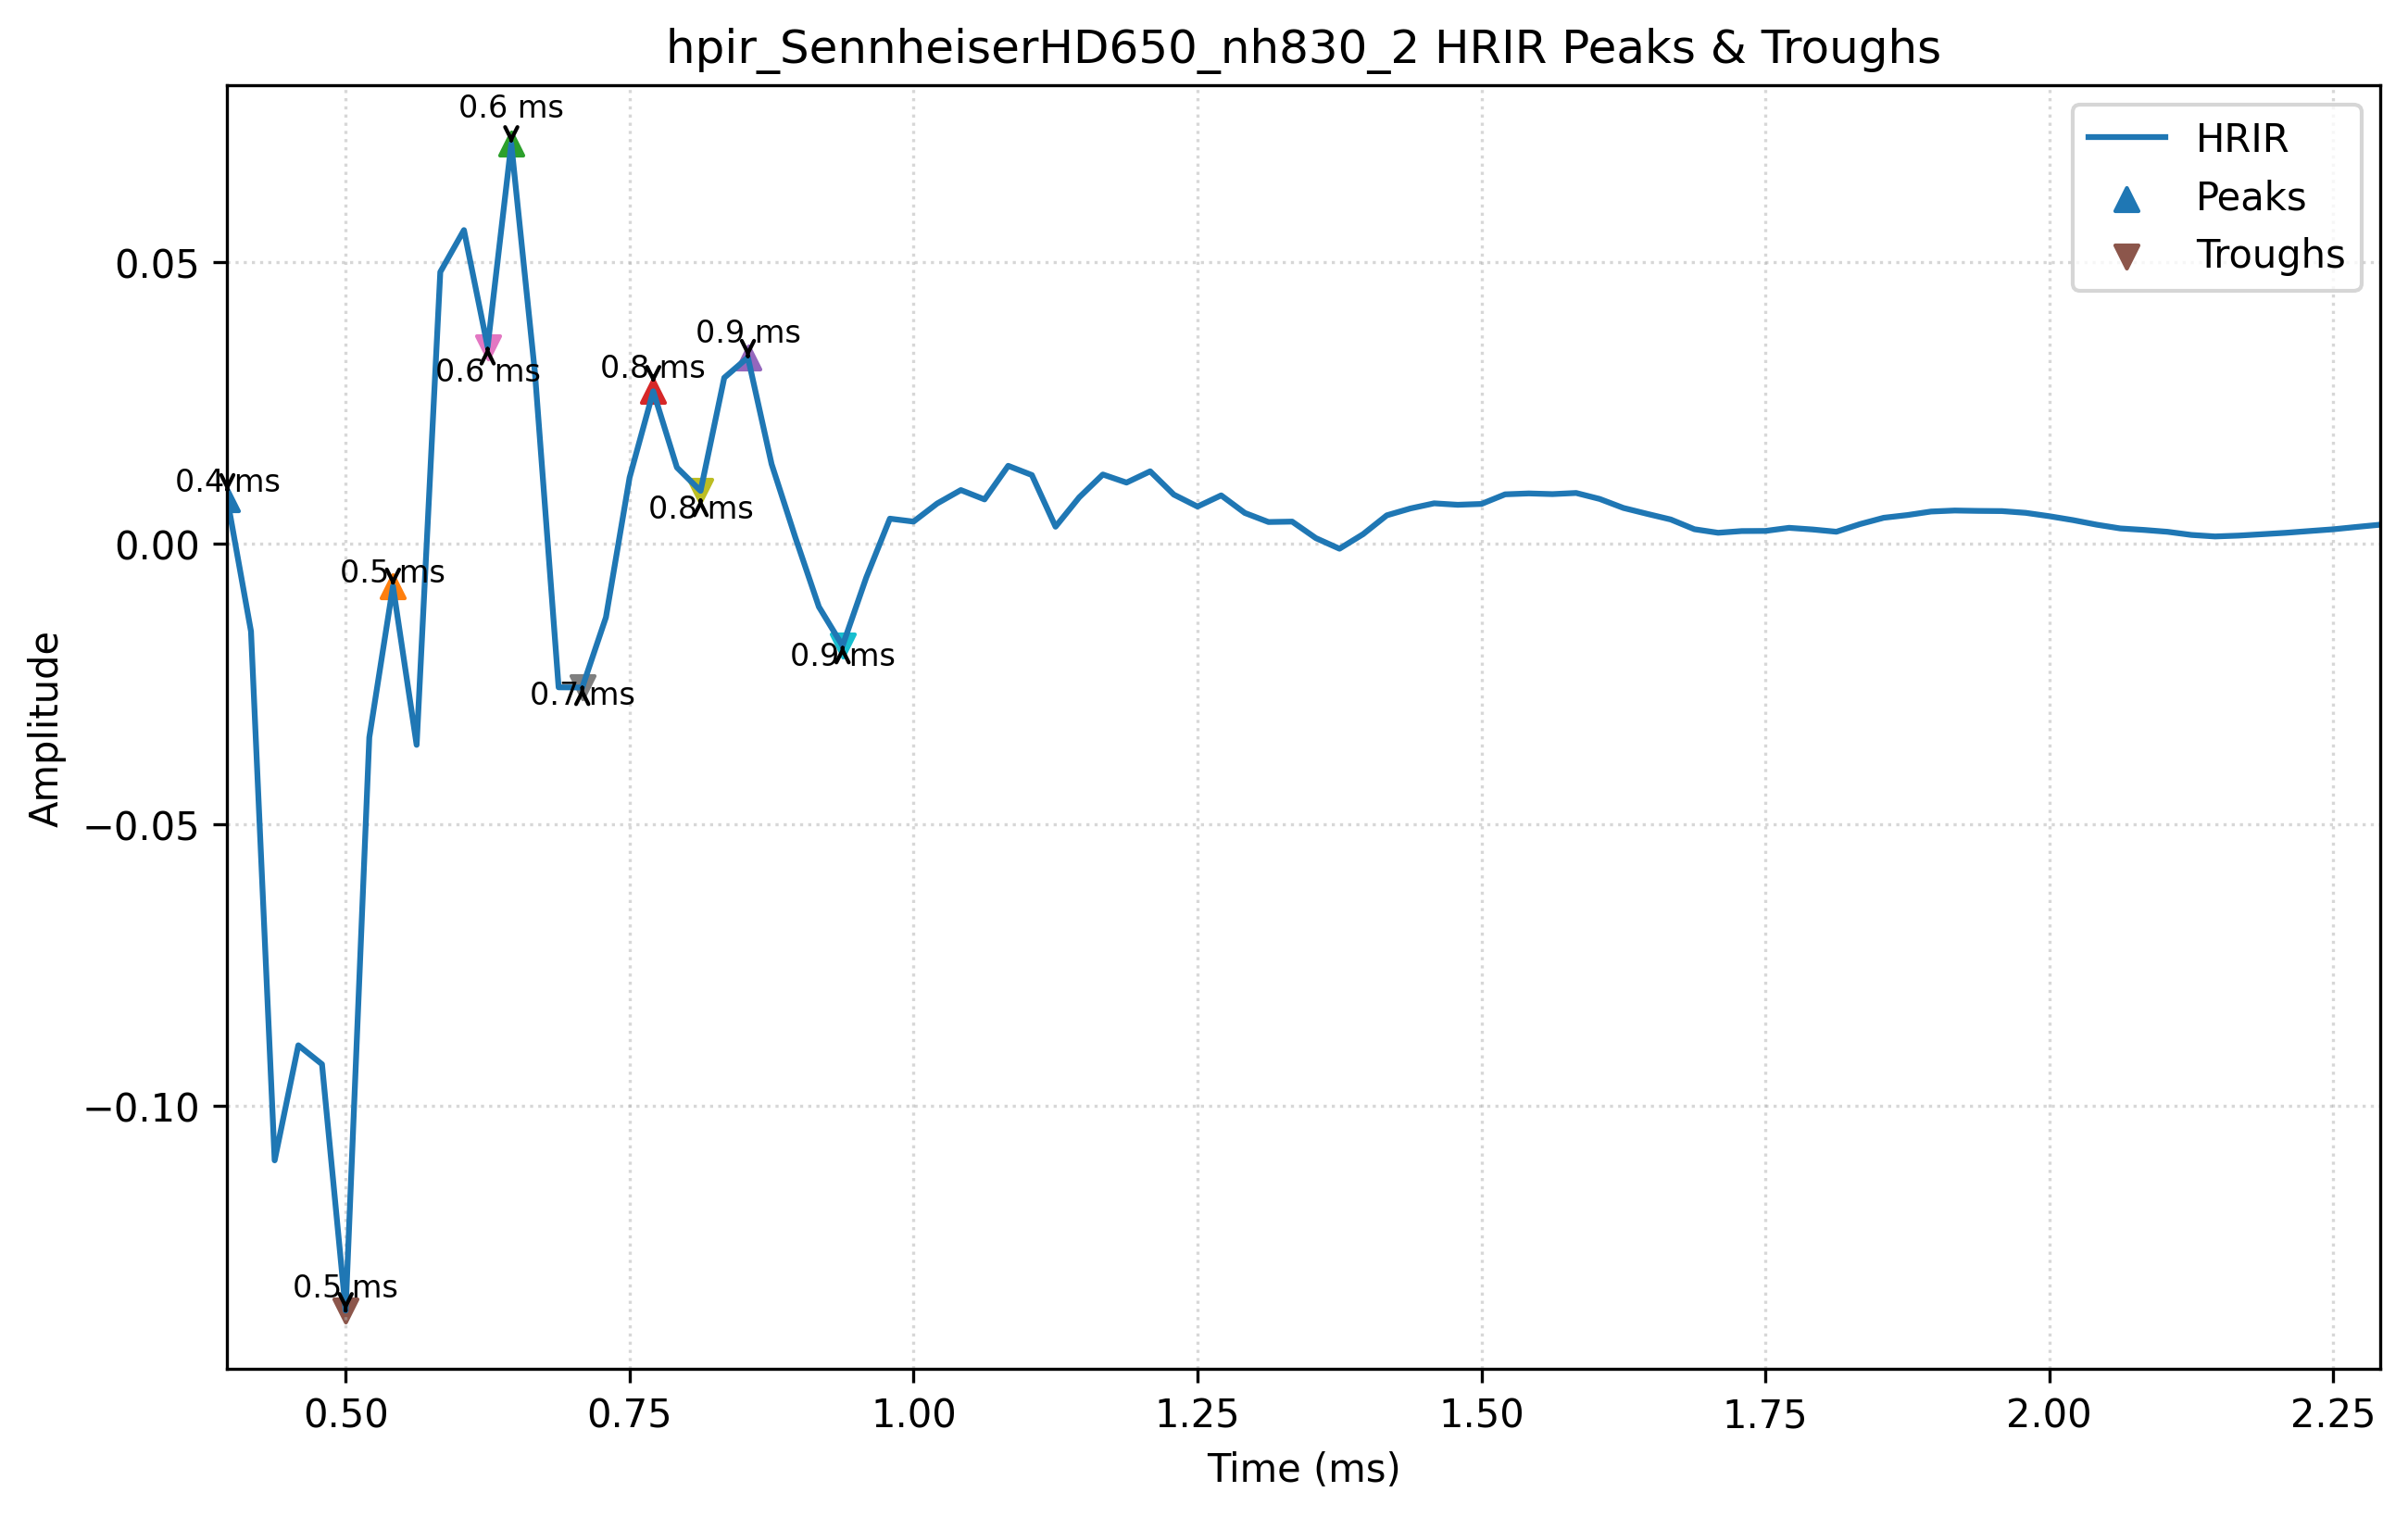

In [5]:
# 4.1 Plot HRIR with annotated peaks and troughs
output_path = plot_hrir(
    times_ms,
    hrir,
    peaks,
    troughs,
    base='hpir_SennheiserHD650_nh830_2',
    outdir='results'
)
print(f"HRIR plot saved to: {output_path}")

from IPython.display import Image, display
display(Image(filename=output_path))

---

## 5. CLI Usage

In [6]:
%cd ..
# Process a SOFA file and save results via CLI
!python3 -m toolbox.main hrir data/hrtf_data/sofa/hpir_SennheiserHD650_nh830.sofa --receiver left --show


/mnt/c/Users/Brody/OneDrive/Documents/Coding/GitHub/Peak_Finding_Toolbox
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/mnt/c/Users/Brody/OneDrive/Documents/Coding/GitHub/Peak_Finding_Toolbox/toolbox/main.py", line 6, in <module>
    import click
ModuleNotFoundError: No module named 'click'
